In [ ]:
Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
Reading the dataframe and printing it.

In [3]:
data=pd.read_csv('insurance.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None) #to print entire dataframe
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


In [ ]:
Checking the number of rows and columns in the dataframe.

In [3]:
data.shape

(1338, 7)

In [ ]:
There are 1338 rows and 7 columns.

In [ ]:
Checking the type of data present in each column. 

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
It is observed that the columns 'sex','smoker' and 'region' contain non integer or non float  values and are classified as object type.

In [ ]:
Checking for the presence of null(Nan) values:
    isnull() checks all the dataframe columns and returns True if null value is present and False if not present. 

In [9]:
data.isnull().sum() #summing up to return the count of null values if present

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.isnull().values.any()

False

In [ ]:
From the above 2 outputs, it is observed that there are no null values present in the dataframe.

In [ ]:
In order to get the numeric data, ._get_numeric_data() is used and the numeric attributes obtained are stored in another dataframe.


In [15]:
numeric_data=data._get_numeric_data()
numeric_data
numeric_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
From the 5 point summary the following are observed:
    i) Age-The density of people belonging to all age groups is almost uniform with the left end(younger age) having more frequency as compared to the the others.
    ii)bmi-The distribution is quite symmetrical without much variation between the bmi values. We observe a mean bmi of 30.6 persisting the most in the population and 50% of the population(between 25th and 7th percentile) possess a bmi value in the range of 26-34.
    iii)Children-On an average the volunteers have 1 child while 75% of the population have a maximum of upto 2 chidren.
    iv)Charges-The charges are highly varying across the population and most of the people are charged less for insurance. 
This can also be visualized in the boxplots provided below.

In [16]:
numeric1=numeric_data[['age','bmi','charges']]
numeric1
numeric1.columns

Index(['age', 'bmi', 'charges'], dtype='object')

age


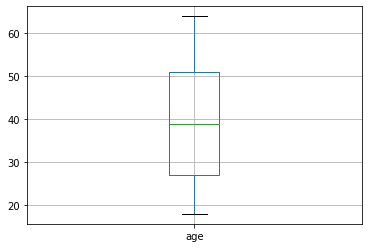

bmi


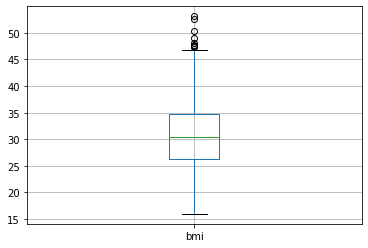

charges


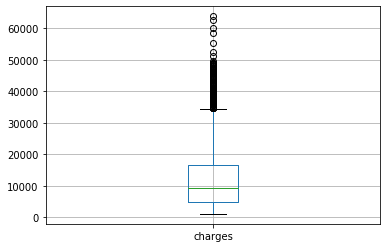

In [18]:
for col in numeric1.columns:
    print(col)
    boxplot = numeric_data.boxplot(column=[col])
    plt.show()

age


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

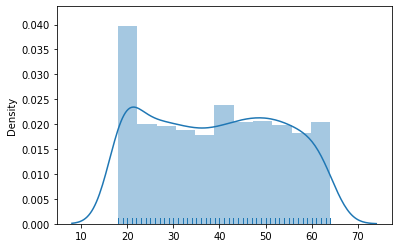

bmi


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

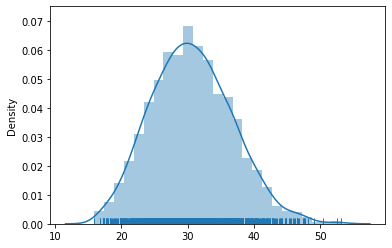

charges


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

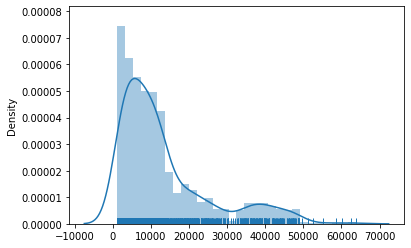

In [12]:

for col in numeric1.columns:
    print(col)
    sns.distplot(numeric1[[col]], hist=True, rug=True)
    plt.show()

In [ ]:
Observing the skew in distribution of each numeric column:

In [13]:
numeric1.skew(axis=0,skipna=True)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

In [ ]:
It is observed that the distribution of charges column is highly skewed(right skewed).
bmi has less skew and age distribution has the least amount of skew which can also be inferred from the uniform distribution as plotted above.

In [ ]:
Checking the presence of outliers in the numeric columns:

age


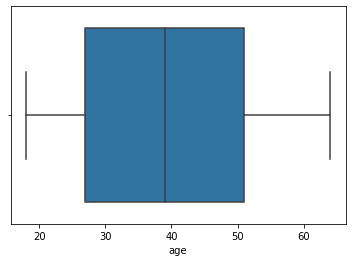

bmi


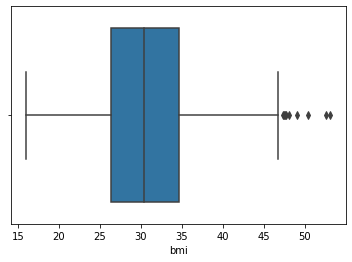

charges


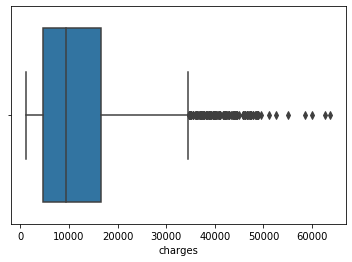

In [15]:
for col in numeric1.columns:
    print(col)
    sns.boxplot(x=numeric1[col])
    plt.show()

In [ ]:
From the boxpot visualizations above, it is seen that the charges boxplot contains a lot of outliers while the bmi boxplot contains less number of outliers while there are no outliers present in the age boxplot.

In [ ]:
Detecting the outliers:

In [19]:
Q1 = numeric1.quantile(0.25)
Q3 = numeric1.quantile(0.75)
IQR = Q3 - Q1
IQR
for col in numeric1.columns:
    df[col] = numeric1[((numeric1[col] < (Q1[col] - 1.5 * IQR[col])) |(numeric1[col] > (Q3[col] + 1.5 * IQR[col])))][col]
    print(df[col])


14     NaN
19     NaN
23     NaN
29     NaN
30     NaN
34     NaN
38     NaN
39     NaN
49     NaN
53     NaN
55     NaN
82     NaN
84     NaN
86     NaN
94     NaN
109    NaN
116    NaN
123    NaN
146    NaN
158    NaN
161    NaN
175    NaN
185    NaN
203    NaN
223    NaN
240    NaN
242    NaN
251    NaN
252    NaN
254    NaN
256    NaN
263    NaN
265    NaN
271    NaN
281    NaN
286    NaN
288    NaN
292    NaN
298    NaN
312    NaN
314    NaN
322    NaN
327    NaN
328    NaN
330    NaN
338    NaN
373    NaN
377    NaN
381    NaN
401    NaN
420    NaN
421    NaN
422    NaN
441    NaN
476    NaN
488    NaN
500    NaN
524    NaN
530    NaN
543    NaN
549    NaN
558    NaN
569    NaN
577    NaN
587    NaN
609    NaN
615    NaN
621    NaN
623    NaN
629    NaN
665    NaN
667    NaN
668    NaN
674    NaN
677    NaN
682    NaN
689    NaN
697    NaN
706    NaN
725    NaN
736    NaN
738    NaN
739    NaN
742    NaN
759    NaN
803    NaN
819    NaN
826    NaN
828    NaN
842    NaN
845    NaN

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
We observe that most of the outliers obtained belong to the charges column of the dataframe.

In [14]:
Q3

age           51.000000
bmi           34.693750
charges    16639.912515
Name: 0.75, dtype: float64

In [23]:
data.select_dtypes(include=['category'])


""
0
1
2
3
4
...
1333
1334
1335
1336


In [ ]:
Obtaining the categorical data from the dataframe:
    Since the categorical columns are of the type 'object' while the 'children' column is of integer type, it is included after the object dtype selection.
 

In [4]:
cd=data.select_dtypes(include='object')

#children=data['children']
#categorical=pd.concat([cd,children],axis=1)
cd['children']=data['children']
cd
#categorical

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sex,smoker,region,children
0,female,yes,southwest,0
1,male,no,southeast,1
2,male,no,southeast,3
3,male,no,northwest,0
4,male,no,northwest,0
5,female,no,southeast,0
6,female,no,southeast,1
7,female,no,northwest,3
8,male,no,northeast,2
9,female,no,northwest,0


In [25]:
data.sex

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
Distribution of Categorical Columns:

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


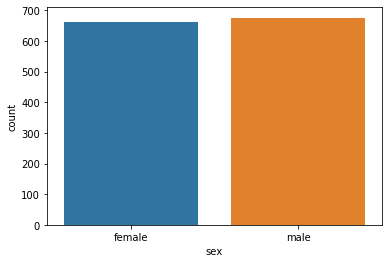

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


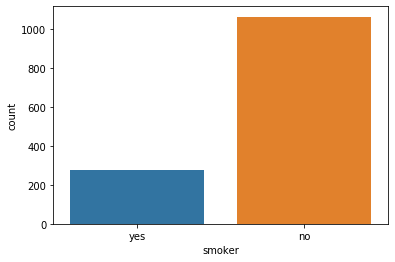

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


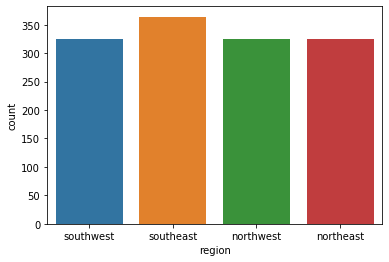

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


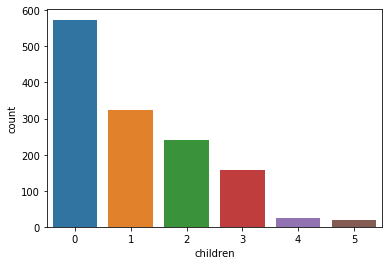

In [6]:
for col in cd.columns:
    sns.countplot(cd[col])
    plt.show()
    

In [ ]:
Observations:
    1) The number of males in this particular population is more than that of females.
    2) Most of the participants are non smokers.
    3) The count of people belonging to the southwest,northwest and northeast regions are equal while the count of people belonging to the southeast region is higher.
    4) Maximum number of people do not have any children while around 500-600 volunteers have atleast 1 child.

In [ ]:
Pairplot of all columns:
    The pairplot is obtained and visualized for each categorical column and compared.

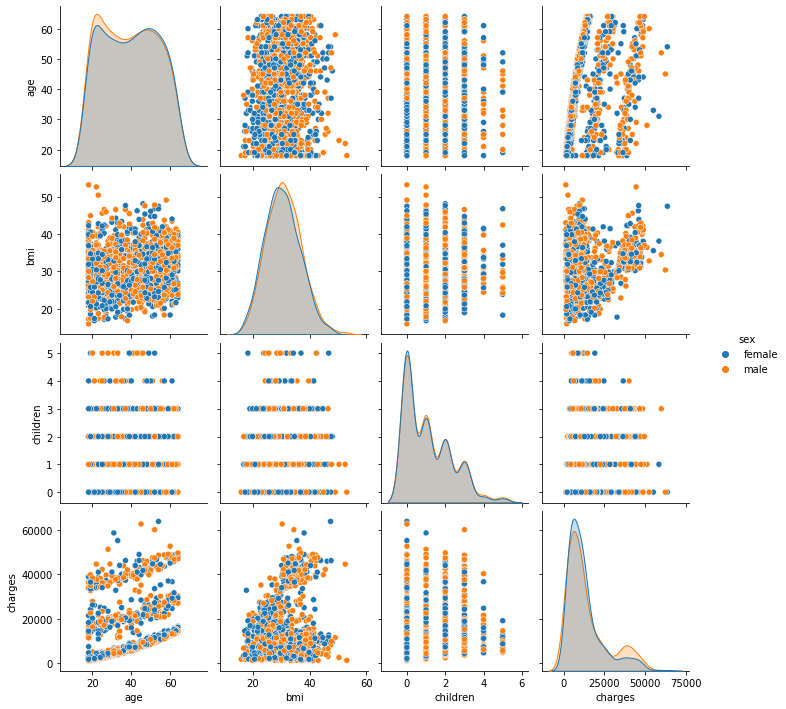

In [6]:
sns.pairplot(data,hue = "sex")
plt.show()


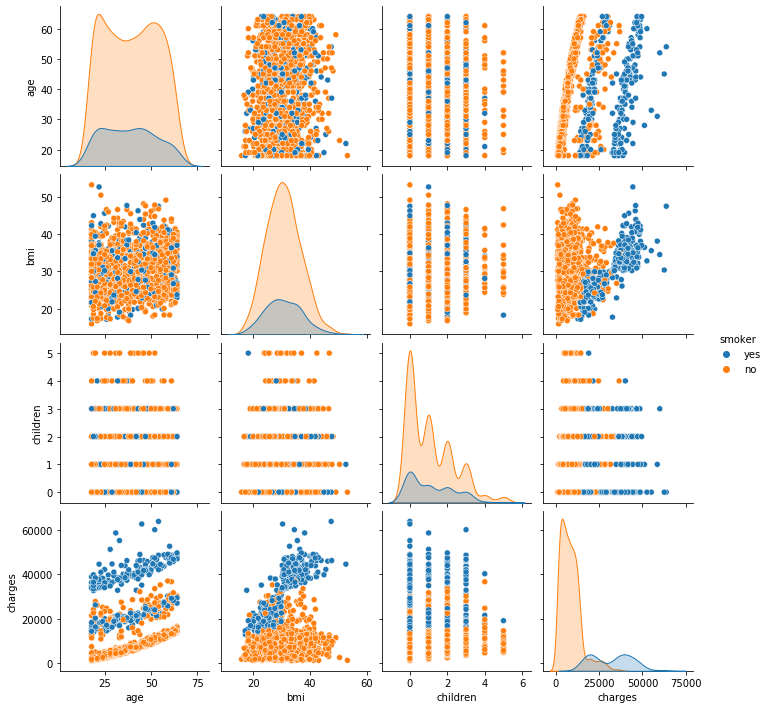

In [7]:
sns.pairplot(data,hue = "smoker")
plt.show()


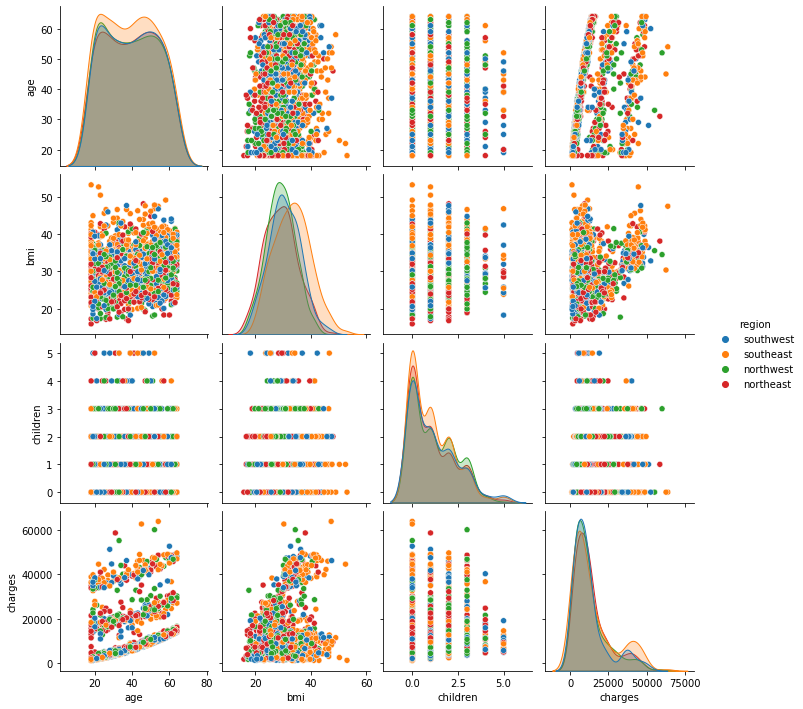

In [8]:
sns.pairplot(data,hue = "region")
plt.show()

In [ ]:
The following are observed for each pairplot obtained above:
    1) Pairplots on the basis of gender:
        i) There is no correlation between bmi and age as well as between bmi and charges.
        ii) A linear correlation is observed between each range of charges and the age of participants wherein for each range of charges from 20000 to 40000,it is found to increase with the increase in age which is possible considering the deterioration of health with age. At the higher range of charges, the number of men charged for the same is more than that of females whereas at the lower ranges, females are more than that of males.
    2)On the basis of smokers and non smokers:
        i)Non smokers are charged the least while smokers are charged the most, the charges of which keep increasing with age.
        ii) Charges of smokers keep increasing with increase in bmi.
    3) On the basis of region:
        i) A linear correlation is observed between charges and age for different ranges of charges. The people belonging to the southeast region are charged more at the higher range of charges.
        
        

In [ ]:
Carrying out t-test on the 2 samples to check if they differ significantly:
    H0(Null Hypothesis): The charges of smokers do not vary significantly from that of non smokers.
    HA(Alternate Hypothesis): The charges of smokers vary significantly from that of non smokers.
A boxplot is first plotted in order to visualize the difference. From the plot provided below, it is observed that there is a significant difference between the mean of the 2 groups. The distribution of smokers is more varied as compared to that of non smokers as well.

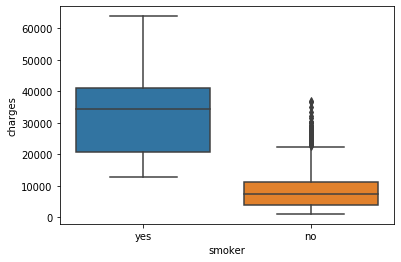

In [13]:
sns.boxplot(x=data['smoker'],y=data['charges'])


In [15]:
a=data[data['smoker'] == 'yes']

In [6]:
a.reset_index(drop=True)

0      16884.92400
1      27808.72510
2      39611.75770
3      36837.46700
4      37701.87680
          ...     
269    36397.57600
270    18765.87545
271    28101.33305
272    43896.37630
273    29141.36030
Name: charges, Length: 274, dtype: float64

In [24]:
b=data[data['smoker'] == 'no']
b['smoker']

1       no
2       no
3       no
4       no
5       no
        ..
1332    no
1333    no
1334    no
1335    no
1336    no
Name: smoker, Length: 1064, dtype: object

In [8]:
b

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [10]:
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

In [11]:
s = np.sqrt((var_a + var_b)/2)

In [23]:
t_statistic, p_value=ttest_ind(a['charges'],b['charges'])
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [ ]:
From the t-statistic and p-value obtained, the null hypothesis is rejected and thus it can be inferred that there is a significant difference between the charges of people who smoke and do not smoke, since the p=value obtained is lesser than 0.05.

In [ ]:
Carrying out t-test of 2 samples containing the bmi of males and females in order to check for the significance of difference between their means:
    H0(Null Hypothesis):The mean of the bmi distribution does not vary with gender.
    HA(Alternate Hypothesis): The mean of the bmi distribution varies with gender.
        i) When visualized using the boxplot, it is observed that the distribution is almost similar with very less difference between the means of the 2 groups.

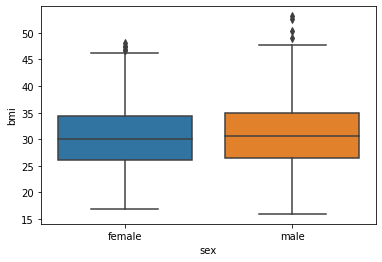

In [9]:
sns.boxplot(x=data['sex'],y=data['bmi'])

In [12]:
male=data[data['sex']=='male']


In [4]:
female=data[data['sex']=='female']

In [8]:
t_statistic, p_value=ttest_ind(male['bmi'],female['bmi'])
print(t_statistic, p_value)

1.696752635752224 0.08997637178984934


In [ ]:
From the p=value which is greater than 0.05,it can be inferred that the difference between the means of the 2 groups is not significant
The null hypothesis can therefore be accepted thereby indicating that the bmi of males does not significantly differ from that of females 

In [ ]:
Testing the difference in proportions of female and male smokers:
    H0(Null Hypothesis)-The proportions are not significantly different(equal),i.e do not vary with gender.
    HA(Alternate Hypothesis)-The proportions are significantly different,i.e they vary with gender.
      From the countplot and the crosstab generated, a difference is observed in the proportion of the 2 groups which are female and male smokers respectively.

In [16]:
male_smokers=male[male['smoker']=='yes']['smoker'].count()
female_smokers=female[female['smoker']=='yes']['smoker'].count()
n_males=male['sex'].count()
n_females=female['sex'].count()



C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


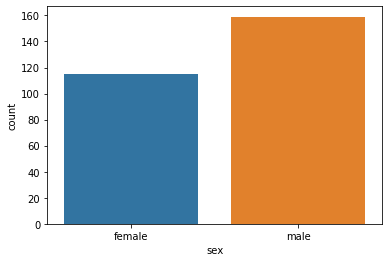

In [7]:
sns.countplot(data[data['smoker']=='yes']['sex'])
plt.show()

In [11]:
crosstab = pd.crosstab(data['sex'],data['smoker'])
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [17]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(stat, pval)

-2.7867402154855503 0.005324114164320532


In [ ]:
Since the p value obtained from the z test is less than 0.05, it can be concluded that the hypothesis that the proportions do not differ significantly can be rejected.

In [ ]:
Checking for the equality in distribution of the bmi of female participants having 0,1 and 2 children:
    H0(Null Hypothesis):The distribution of bmi of females does not vary with the number of children.
    HA(Alternate Hypothesis):Atleast one of the distributions varies significantly from the others thereby indicating a variation with the number of children.

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

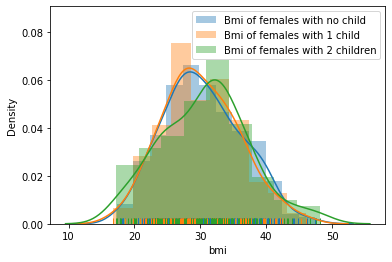

In [8]:
df0=female[female['children']==0]['bmi']
df1=female[female['children']==1]['bmi']
df2=female[female['children']==2]['bmi']
sns.distplot(df0, hist=True, rug=True,label="Bmi of females with no child")
plt.legend()
sns.distplot(df1, hist=True, rug=True,label="Bmi of females with 1 child")
plt.legend()
sns.distplot(df2, hist=True, rug=True,label="Bmi of females with 2 children")
plt.legend()
plt.show()

In [ ]:
From the distribution plots of the 3 groups above, it is seen that the distribution of bmi of females with no child and 1 child are almost the same while that of females with 2 children is seen to show a slight variation.

In [21]:
print(df0.describe())
print(" ")
print(df1.describe())
print(" ")
print(df2.describe())


count    289.000000
mean      30.361522
std        5.966934
min       17.290000
25%       26.200000
50%       29.925000
75%       34.600000
max       47.410000
Name: bmi, dtype: float64
 
count    158.000000
mean      30.052658
std        5.786831
min       16.815000
25%       25.982500
50%       29.567500
75%       33.942500
max       46.090000
Name: bmi, dtype: float64
 
count    119.00000
mean      30.64979
std        6.62820
min       17.19500
25%       25.77000
50%       31.30000
75%       34.75000
max       48.07000
Name: bmi, dtype: float64


In [22]:
df0=female[female['children']==0]['bmi']
df1=female[female['children']==1]['bmi']
df2=female[female['children']==2]['bmi']
stats.f_oneway(df0,df1,df2)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [ ]:
Since a p-value of 0.715 is obtained, the null hypothesis can be accepted and indicate an equality in the distributions of the 3 groups,